# PEtab extention for FitMultiCell 

In this example, we will show how a PEtab problem can be defined in FitMultiCell pipeline. For this, we will use a 1D activator-inhibitor model<sup>1</sup>. First, we will try to define the problem without the use of PEtab format.

## Regular FitMultiCell problem

At first, lets's import the required packages.

In [1]:
import petab_MS
from fitmulticell.PEtab.base import PetabImporter
from fitmulticell.model import MorpheusModel as morpheus_model
from fitmulticell.model import MorpheusModels as morpheus_models
from pyabc.sampler import RedisEvalParallelSampler
from pyabc.sampler import MulticoreEvalParallelSampler
from pyabc import QuantileEpsilon
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import pyabc
import matplotlib.pylab as plt
from pathlib import Path
import os
import tempfile

ABC.External ERROR: Install rpy2 to enable simple support for the R language.


Now, let's define the xpath for each parameter.

Here, we define the ground truth value for each parameter which we used to generate the senthitic data.

Next, we will import the senthitic data and give the path to Morpheus model.

Then, we will construct Morpheus model.

Let's now run a simulation with the ground truth parameters and plot it to see how it looks.

Then, we will further define the limits and the scale for parameters space.

Now, we will define our objective function:

In [28]:
def eucl_dist(sim, obs):
    if sim == -15:
        print("timeout")
        return np.inf

    total = 0
    for key in sim:
        if key in ('loc', "condition1__IdSumstat__time", "condition1__IdSumstat__cell.id", "condition1__IdSumstat__Tension"):
            continue
        print(key)
        x = np.array(sim[key])
        y = np.array(obs[key])
        z = np.array(obs[key + "_SEM"])
        # simulation does not finish successfuly, only partial part of the
        # result wrtten. In such case, ignore the parameter vector
        if x.size != y.size:
            # size does not match
            return np.inf
        # if np.max(y) != 0:
        #     x = x/np.max(y)
        #     y = y/np.max(y)
        total += np.sum(((x - y)/z) ** 2)
    return total


Now, we are ready to start the fitting.

Let's now plot the epsilon over different iteration.

Also, let's plot the kernal density function for our parameters of interest.

## Define the problem using PEtab extention

Next, we want to fit the same model but now we want to use PEtab format to construct our problem. 

We will start by import a PEtab problem from the yamel file that we already define according to PEtab standared.

In [3]:
os.chdir('..')
petab_problem_path = str((Path(os.getcwd())) / 'PEtab_problems' / 'Liver_regeneration' / 'Meyer_MolSystBiol_2020.yaml')
petab_problem = petab_MS.Problem.from_yaml(petab_problem_path)

In [4]:
importer = PetabImporter(petab_problem)

Then, we will generate all required component from the PEtab problem, such as prior, measurement, parameters' scale, etc.

In [5]:
PEtab_prior = importer.create_prior()

/home/emad/Insync/blackhand.3@gmail.com/Google Drive/Bonn/Github/libpetab-python-MS/petab_MS/parameters.py:375: RuntimeWarning: invalid value encountered in log10
  return np.log10(parameter)
/home/emad/Insync/blackhand.3@gmail.com/Google Drive/Bonn/Github/libpetab-python-MS/petab_MS/parameters.py:375: RuntimeWarning: divide by zero encountered in log10
  return np.log10(parameter)


In [6]:
par_map_imported = importer.get_par_map()

In [7]:
obs_pars_imported = petab_problem.get_x_nominal_dict(scaled=True)

In [8]:
PEtab_par_scale = petab_problem.get_optimization_parameter_scales()
obs_pars_imported

{'k1': 1.0,
 'K_M1': -3.0969100130080562,
 'k2': 0.3053513694466238,
 'K_M2': -0.6020599913279624,
 'k3_0': 0.2304489213782739,
 'k4': -0.721246399047171,
 'k5': 1.0,
 'k6': -0.744727494896694,
 'k7': 1.0,
 'k8': 1.0,
 'k9': -0.7695510786217261,
 'k10': 0.25527250510330607,
 'k11': 1.4771212547196624,
 'intensity_normalization_total': 0.0}

In [9]:
dict_data_imported = petab_problem.get_measurement_dict()

After that, we will be able to construct our model form the PEtab importer

In [10]:
PEtab_model = importer.create_model()


FitMultiCell.Model INFO: Successfully loaded model


let's now run a simulation tryjectory for the imported PEtab problem.

In [11]:
PEtab_tryjectory = PEtab_model.sample(obs_pars_imported)

In [12]:
PEtab_tryjectory

{'condition1__IdSumstat__time': array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6,
        0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
        0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9,
        0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2,
        1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4,
        1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6,
        1.6, 1.7, 1.

In [13]:
dict_data_imported

{'condition1__IdSumstat__YAP_nuclear_observable_SEM': array([1.      , 1.      , 1.      , 1.      , 1.      , 1.      ,
        1.      , 1.      , 1.      , 1.      , 1.06316 , 1.174304,
        1.27876 , 1.410496, 1.496929, 1.636696, 1.60042 , 1.454974,
        1.487127, 1.347551, 1.209071, 1.28976 , 1.520645, 1.517181,
        1.55356 , 1.649132, 1.731132, 1.60413 , 1.56927 , 1.381957,
        1.102287, 1.239916, 1.365445, 1.51172 , 1.581315, 1.714429,
        1.754233, 1.62836 , 1.617638, 1.501248, 0.936666, 1.004675,
        1.098926, 1.202815, 1.256231, 1.31515 , 1.349312, 1.224346,
        1.14507 , 1.065278, 0.725085, 0.814514, 0.817781, 0.946491,
        0.993993, 1.071735, 1.119022, 0.989987, 1.007928, 0.94257 ]),
 'condition1__IdSumstat__YAP_total_observable': array([1.      , 1.      , 1.      , 1.      , 1.      , 1.      ,
        1.      , 1.      , 1.      , 1.      , 1.165735, 1.200471,
        1.279887, 1.269325, 1.304933, 1.363516, 1.318618, 1.257454,
        1.2031

In [29]:
eucl_dist(PEtab_tryjectory, dict_data_imported)

condition1__IdSumstat__YAP_nuclear_observable


inf

Then, we can modify any of the model's attributes.

In [31]:
PEtab_model.ignore_list=["cell.id", "Tension", "time"]
PEtab_model.timeout=900

Now, we can go ahead and start the fitting of the PEtab problem.

In [33]:
    abc = pyabc.ABCSMC(PEtab_model, PEtab_prior, eucl_dist, population_size=10)
db_path = "sqlite:///" + os.path.join(tempfile.gettempdir(), "PEtab_ActivatorInhibitor_1D.db")
PEtab_history = abc.new(db_path, dict_data_imported)
PEtab_history = abc.run(max_nr_populations=8)


Now, let us compare the regular fitting problem to that that was initialized by PEtab. lets start by plotting the epsilon of the two problems. 

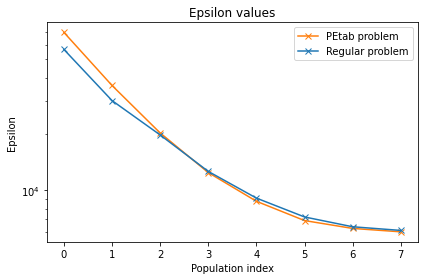

In [29]:
ax= pyabc.visualization.plot_epsilons(PEtab_history, colors=['C1'])
pyabc.visualization.plot_epsilons(history,ax=ax, colors=['C0'])
ax.legend(["PEtab problem","Regular problem"])


Finally, let's plot and compare the final distribution of the two problems. 

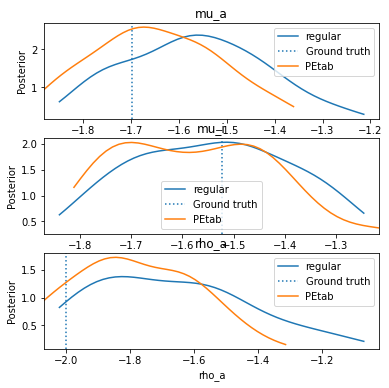

In [30]:
fig, axes = plt.subplots(3,1, figsize=(6, 6))
ax =axes[0]
df, w = history.get_distribution(t=history.max_t)
pyabc.visualization.plot_kde_1d(df, w, 'mu_a',title="mu_a", refval=obs_pars_log, refval_color='C0', ax=ax)
df, w = PEtab_history.get_distribution(t=PEtab_history.max_t)
pyabc.visualization.plot_kde_1d(df, w, 'mu_a', refval_color='C1', ax=ax)
ax.legend(["regular","Ground truth","PEtab"])

ax =axes[1]
df, w = history.get_distribution(t=history.max_t)
pyabc.visualization.plot_kde_1d(df, w, 'mu_i', title="mu_i", refval=obs_pars_log, refval_color='C0', ax=ax)
df, w = PEtab_history.get_distribution(t=PEtab_history.max_t)
pyabc.visualization.plot_kde_1d(df, w, 'mu_i', refval_color='C1', ax=ax)
ax.legend(["regular","Ground truth","PEtab"])

ax =axes[2]
df, w = history.get_distribution(t=history.max_t)
pyabc.visualization.plot_kde_1d(df, w, 'rho_a', title="rho_a", refval=obs_pars_log, refval_color='C0', ax=ax)
df, w = PEtab_history.get_distribution(t=PEtab_history.max_t)
pyabc.visualization.plot_kde_1d(df, w, 'rho_a', refval_color='C1', ax=ax)
ax.legend(["regular","Ground truth","PEtab"])


References:

<sup>1</sup> A. Gierer, H. Meinhardt: A Theory of Biological Pattern Formation. Kybernetik 12: 30-39, 1972.
